# Study of the Wines database

### The database contains the information of wines analysis.

In [1]:
pip install kagglehub
pip install pandas
pip install seaborn
pip install scipy
pip install sklearn

SyntaxError: invalid syntax (281751783.py, line 1)

In [24]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importing the dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

/Users/rafaeldeflon/Documents/Wines/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/rafaeldeflon/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2


In [7]:
#Opening the data set

import pandas as pd

# Load the dataset
df = pd.read_csv(f"{path}/winequality-red.csv")

# Display the first few rows of the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Count the number of null values in each column

null_values_per_column = df.isnull().sum()
print(null_values_per_column)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
# Giving each wine a unique identifier
df['wine_cd'] = range(1, len(df) + 1)
df.head()

# Reorder columns to make 'wine_cd' the first column
cols = ['wine_cd'] + [col for col in df.columns if col != 'wine_cd']
df = df[cols]
df.head()

# Order the rows by the lowest quality to the highest
df = df.sort_values(by='quality')
df.head()

,wine_cd,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,1479,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,833,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,900,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,1375,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,460,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3


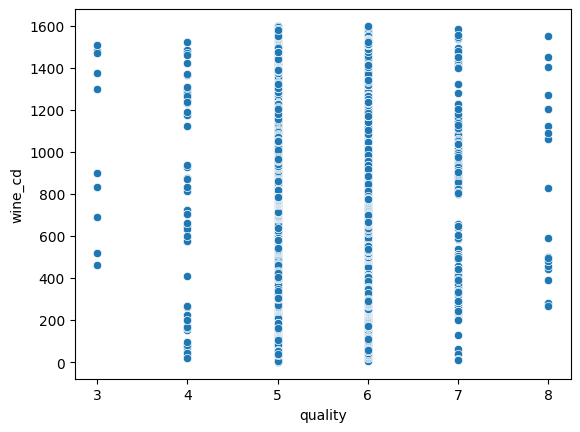

In [10]:
import seaborn as sns 
quality_value = sns.scatterplot(x='quality', y='wine_cd', data=df)

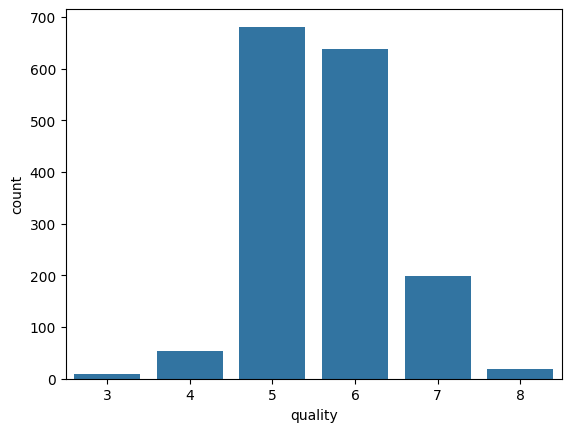

In [11]:
quality_columns = sns.countplot(x='quality', data=df)

### Through the visual analysis is visable that in the dataset there is only six possible quality scores (3,...,8). 
#### Let's define scores 7 and 8 as good and then explore some visual correlations

In [12]:
# Labeling the quality of the wine as good or bad

df['quality_label'] = df['quality'].apply(lambda x: 'good' if x > 6.5 else 'bad')
df.head()

,wine_cd,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
1478,1479,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,bad
832,833,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,bad
899,900,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,bad
1374,1375,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,bad
459,460,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,bad


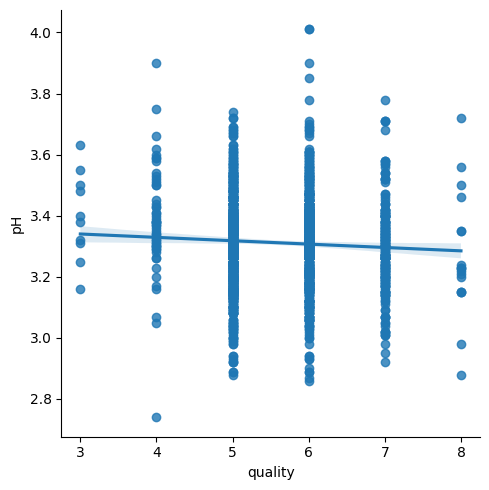

In [13]:
# Visualizing the relationship between quality and pH
quality_value = sns.lmplot(x='quality', y='pH', data=df)

##### It seams that a higher pH makes a worst wine, but the correlation is not viually clear.

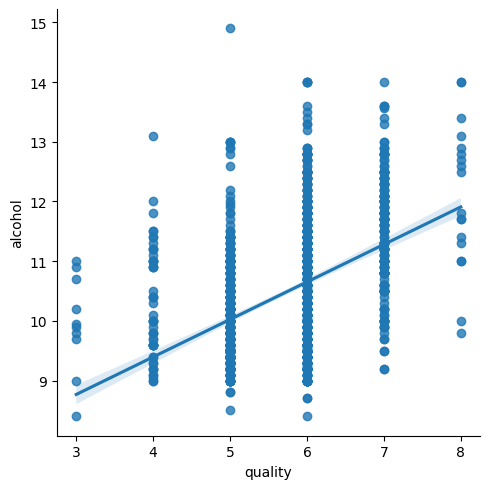

In [14]:
# Visualizing the relationship between quality and alcohol content
quality_value = sns.lmplot(x='quality', y='alcohol', data=df)

##### It seams that a lower alcohol makes a worst wine, but the correlation seams more clear.
##### Let's see if pH and alcohol have a sifnificant difference.

In [15]:
# Having the average values of each column for good and bad wines

df.groupby('quality_label').mean()

,wine_cd,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_label,,,,,,,,,,,,,
bad,795.020260,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828
good,831.714286,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [16]:
from scipy.stats import ttest_ind

# Separate the data into 'good' and 'bad' quality wines
good_wines = df[df['quality_label'] == 'good']
bad_wines = df[df['quality_label'] == 'bad']

# Calculate the p-value for each column
p_values = {}
for col in cols[1:-1]:  # Exclude 'wine_cd' and 'quality_label'
    t_stat, p_val = ttest_ind(good_wines[col], bad_wines[col], equal_var=False)
    p_values[col] = p_val

# Display the p-values
p_values
# Convert the p-values dictionary to a DataFrame for better visualization
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Column', 'P-Value'])
p_values_df

,Column,P-Value
0,fixed acidity,2.796749e-05
1,volatile acidity,3.165494e-31
2,citric acid,4.497947e-16
3,residual sugar,5.033308e-02
4,chlorides,2.067627e-08
5,free sulfur dioxide,3.747866e-03
6,total sulfur dioxide,4.228165e-08
7,density,2.775161e-07
8,pH,2.278993e-02
9,sulphates,9.945136e-20


In [17]:
# Display the significant features
significant_cols = p_values_df[p_values_df['P-Value'] < 0.05]
print(significant_cols)

                  Column       P-Value
0          fixed acidity  2.796749e-05
1       volatile acidity  3.165494e-31
2            citric acid  4.497947e-16
4              chlorides  2.067627e-08
5    free sulfur dioxide  3.747866e-03
6   total sulfur dioxide  4.228165e-08
7                density  2.775161e-07
8                     pH  2.278993e-02
9              sulphates  9.945136e-20
10               alcohol  7.793167e-47


## Let's build a ML to predict the wine quality

In [18]:
import sklearn

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select significant features
significant_features = ['fixed acidity', 'volatile acidity', 'citric acid', 
                        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                        'density', 'pH', 'sulphates', 'alcohol']

# Feature matrix (X) and target variable (y)
X = df[significant_features]
y = (df['quality_label'] == 'good').astype(int)  # Convert to binary (1 for good, 0 for bad)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.91875

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       277
           1       0.77      0.56      0.65        43

    accuracy                           0.92       320
   macro avg       0.85      0.77      0.80       320
weighted avg       0.91      0.92      0.91       320


Confusion Matrix:
 [[270   7]
 [ 19  24]]


In [21]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Accuracy: 0.921875


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.903125


### XGBoost

In [26]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))


XGBoost Accuracy: 0.9125


### Using the Random Forest

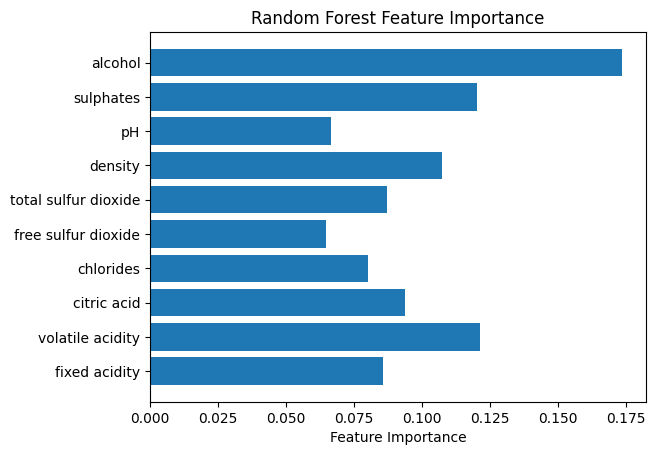

In [27]:
import matplotlib.pyplot as plt

# Feature importance plot
feature_importances = rf_model.feature_importances_
plt.barh(significant_features, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [28]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'wine_quality_model.pkl')

# Load the model for future use
loaded_model = joblib.load('wine_quality_model.pkl')
